<h4>Objetivo: avaliação de vôo</h4>

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## recebendo dados

In [2]:
treino = pd.read_csv('./data/airline_train.csv')
teste = pd.read_csv('./data/airline_test.csv')

- Gender: genero (Female, Male)
- Customer Type: tipo de consumidor (Loyal customer, disloyal customer)
- Age: idade
- Type of Travel: propósito da viagem (Personal Travel, Business Travel)
- Class: classe do vôo (Business, Eco, Eco Plus)
- Flight distance: distancia do voo
- Inflight wifi service: satisfação com wifi (0:Not Applicable;1-5)
- Departure/Arrival time convenient: satisfação do horário de saída e chegada
- Ease of Online booking: satisfação da reserva online
- Gate location: satisfação da localização do portão
- Food and drink: satisfação da comida e bebida
- Online boarding: satisfação do embarque online
- Seat comfort: satisfação do conforto do acento
- Inflight entertainment: satisfação do entretenimento abordo
- On-board service: satisfação do serviço de bordo
- Leg room service: satisfação do serviço de quarto Leg
- Baggage handling: satisfação no manuseio de bagagem
- Check-in service: satisfação do serviço de Check-in
- Inflight service: satisfação do serviço de bordo
- Cleanliness: satisfação de limpeza
- Departure Delay in Minutes: minutos de atraso da partida
- Arrival Delay in Minutes: minuto de atraso da chegada
- Satisfaction: nível de satisfação (Satisfaction, neutral or dissatisfaction)

In [3]:
for col in treino.columns:
    print(f"Coluna: {col}")
    print(treino[col].unique())
    print("-" * 30)

Coluna: Unnamed: 0
[     0      1      2 ... 103901 103902 103903]
------------------------------
Coluna: id
[ 70172   5047 110028 ...  68825  54173  62567]
------------------------------
Coluna: Gender
['Male' 'Female']
------------------------------
Coluna: Customer Type
['Loyal Customer' 'disloyal Customer']
------------------------------
Coluna: Age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
------------------------------
Coluna: Type of Travel
['Personal Travel' 'Business travel']
------------------------------
Coluna: Class
['Eco Plus' 'Business' 'Eco']
------------------------------
Coluna: Flight Distance
[ 460  235 1142 ...  974 1479  400]
------------------------------
Coluna: Inflight wifi service
[3 2 4 1 5 0]
------------------------------
Coluna: Departure/Arrival time convenient
[4 2 5 3

In [4]:
# removendo valores nulos
treino = treino.dropna()
teste = teste.dropna()

In [5]:
# verificando se tem linhas duplicadas
treino.duplicated().sum()

0

In [6]:
mapeamento = {
    # gender
    'Male': 0,
    'Female': 1,

    # customer type
    'Loyal Customer': 0,
    'disloyal Customer': 1,

    # type of travel
    'Personal Travel': 0,
    'Business travel': 1,

    # class
    'Eco': 0,
    'Eco Plus': 1,
    'Business': 2,

    # satisfaction
    'neutral or dissatisfied': 0,
    'satisfied': 1,
}

In [7]:
colunas = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

treino[colunas] = treino[colunas].replace(mapeamento)
teste[colunas] = teste[colunas].replace(mapeamento)

In [8]:
retirar = ['satisfaction']

x_treino = treino.drop(retirar, axis=1)
y_treino = treino['satisfaction']

x_teste = teste.drop(retirar, axis=1)
y_teste = teste['satisfaction']

## criando modelo

In [9]:
x_treino.shape

(103594, 24)

In [10]:
modelo = keras.models.Sequential([
    keras.layers.Dense(units=1, input_dim=24, activation='sigmoid',name='entrada'),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(32),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.5),
    keras.layers.Dense(16),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(16),    
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(256, activation='relu',kernel_initializer=keras.initializers.RandomNormal(seed=142),name='oculta_menor'),
    keras.layers.Dense(1,activation='sigmoid',name='saida')
])

c:\Users\nessa\OneDrive\Desktop\coding\python\machineLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
adam = keras.optimizers.Adam(learning_rate=.002)

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ entrada (Dense)                 │ (None, 1)                 │         25 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 1)                 │          4 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1)                 │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 1)                 │          4 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 16)                │         32 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 16)                │         64 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 32)                │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 32)                │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 16)                │         64 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 32)                │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 32)                │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_6           │ (None, 16)                │         6

 Total params: 2,674 (10.45 KB)

 Trainable params: 2,446 (9.55 KB)

 Non-trainable params: 228 (912.00 B)

In [12]:
callbacks = [
    # parar mais cedo se perceber que a rede estagnou e caiu em um mínimo local
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    
    # verificar o checkpoint do nosso modelo que teve o melhor resultado
    # salva o modelo nesse filepath monitorando a perda da validação e salvando apenas a melhor epoca
    keras.callbacks.ModelCheckpoint(filepath='./modelos/satisfacao_melhor_modelo.keras', monitor='val_loss', save_best_only=True)
]

In [13]:
historico = modelo.fit(x_treino, y_treino, epochs=100, validation_split=0.3)

Epoch 1/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.5399 - loss: 0.7097 - val_accuracy: 0.4308 - val_loss: 0.7631
Epoch 2/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5612 - loss: 0.6874 - val_accuracy: 0.5692 - val_loss: 0.7844
Epoch 3/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.5666 - loss: 0.6851 - val_accuracy: 0.5692 - val_loss: 0.7191
Epoch 4/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.5632 - loss: 0.6856 - val_accuracy: 0.5692 - val_loss: 0.6910
Epoch 5/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5634 - loss: 0.6859 - val_accuracy: 0.5692 - val_loss: 1.4589
Epoch 6/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.5673 - loss: 0.6846 - val_accuracy: 0.5692 - val_loss: 0.6864
Epoch 7/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.5666 - loss: 0.6846 - val_accuracy: 0.5692 - val_loss: 0.6836
Epoch 8/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.

## prevendo com modelo

In [14]:
testes = modelo.predict(x_teste)

810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [15]:
# avaliação
indice = 0
print('resultado teste:', np.argmax(testes[indice]))
print('satisfação do teste:', y_teste[indice])

resultado teste: 0
satisfação do teste: 1


In [16]:
perda, acuracia = modelo.evaluate(x_teste, y_teste)
print('Perda do teste:', perda)
print('Acurácia do teste:', acuracia)

810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5597 - loss: 0.6862
Perda do teste: 0.6857128143310547
Acurácia do teste: 0.5610783100128174


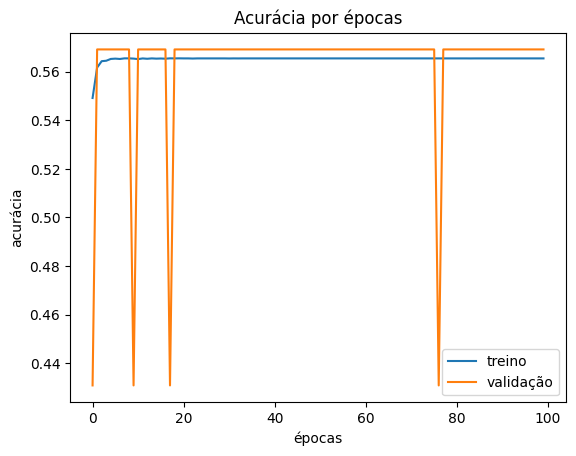

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

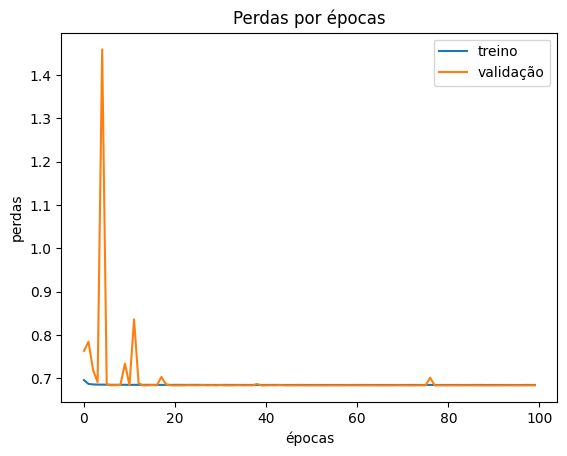

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])